In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import os

In [33]:
df=pd.read_csv("artifacts/raw.csv")
df.select_dtypes(include="object").columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [3]:
df["bmi"]=df["bmi"].fillna(np.mean(df["bmi"]))

In [4]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [5]:
print(df[df["work_type"]=='children']["stroke"]==1)
(df[df["work_type"]=='children']["stroke"]==1).sum()
# children : stroke[0]

162      True
245      True
249     False
282     False
290     False
        ...  
5089    False
5094    False
5095    False
5098    False
5104    False
Name: stroke, Length: 687, dtype: bool


np.int64(2)

In [6]:
print(df[df["work_type"]=='Never_worked']["stroke"]==1)
b=(df[df["work_type"]=='Never_worked']["stroke"]==1).sum()
a=(df[df["work_type"]=='Never_worked']["stroke"]==1).count()
print(b)
print(f"percentage is {b*100/a}")
# newer worked ==0 

253     False
603     False
886     False
939     False
959     False
1462    False
1789    False
1922    False
2346    False
2721    False
2740    False
2781    False
2917    False
3196    False
3468    False
3972    False
4068    False
4160    False
4410    False
4611    False
4772    False
4785    False
Name: stroke, dtype: bool
0
percentage is 0.0


In [7]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [8]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [9]:
a=(df[df["smoking_status"]=="formerly smoked"]["stroke"]).count() #4.7% non smoked =stroke
b=(df[df["smoking_status"]=="formerly smoked"]["stroke"]).sum()   #3%  unknown =stroke
print(b*100/a)                                                    #5% smokes
                                                                  #8% formerly smoked

7.909604519774011


In [10]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
a=(df[df["ever_married"]=='No']["stroke"]).count()
b=(df[df["ever_married"]=='No']["stroke"]).sum() #6.5% yes==stroke
print(b*100/a)                                   # 1.65% no==stroke   

1.6505406943653955


In [12]:
a=(df["stroke"]).count()
b=(df["stroke"]).sum()
print(b*100/a)    

4.87279843444227


In [13]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [14]:
df[df["gender"]=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [15]:
b=(df[df["hypertension"]==1]["stroke"]).sum()
a=(df[df["hypertension"]==1]["stroke"]).count()
print(a,b)                                         #13% hypertension ==stroke
print(f"percentage is {b*100/a}")                  #17% heart desease ==stroke

498 66
percentage is 13.25301204819277


In [16]:
train=pd.read_csv("artifacts/train.csv")
train[train["gender"]=="Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2046,56156,Other,26,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [17]:
test=pd.read_csv("artifacts/test.csv")
test[test["gender"]=="0ther"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [18]:
train["bmi"]=train["bmi"].fillna(np.mean(train["bmi"]))
test["bmi"]=test["bmi"].fillna(np.mean(test["bmi"]))
train=train[train["gender"]!="Other"]
test=test[test["gender"]!="Other"]

In [19]:
train_gender=pd.get_dummies(train["gender"],drop_first=True,dtype="int")
train_ever=pd.get_dummies(train["ever_married"],drop_first=True,dtype="int")
train_work_type=pd.get_dummies(train["work_type"],drop_first=True,dtype="int")
train_Residence_type=pd.get_dummies(train["Residence_type"],drop_first=True,dtype="int")
train_smoking_status=pd.get_dummies(train["smoking_status"],drop_first=True,dtype="int")
train=pd.concat([train,train_ever,train_gender,train_Residence_type,train_smoking_status,train_work_type],axis=1)

In [20]:
test_gender=pd.get_dummies(test["gender"],drop_first=True,dtype="int")
test_ever=pd.get_dummies(test["ever_married"],drop_first=True,dtype="int")
test_work_type=pd.get_dummies(test["work_type"],drop_first=True,dtype="int")
test_Residence_type=pd.get_dummies(test["Residence_type"],drop_first=True,dtype="int")
test_smoking_status=pd.get_dummies(test["smoking_status"],drop_first=True,dtype="int")
test=pd.concat([test,test_ever,test_gender,test_Residence_type,test_smoking_status,test_work_type],axis=1)
x_te=test.drop(['gender','id',"ever_married","work_type","Residence_type","smoking_status","stroke"],axis=1)
y_te=test["stroke"]

In [21]:
x=train.drop(['gender','id',"ever_married","work_type","Residence_type","smoking_status","stroke"],axis=1)

In [22]:
y=train["stroke"]

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
classifier=DecisionTreeClassifier(max_depth=5)
classifier.fit(x,y)

DecisionTreeClassifier(max_depth=5)

In [25]:
classifier.score(x,y)

0.9535111328602888

In [26]:
classifier.score(x_te,y_te)

0.952054794520548

[Text(0.5223214285714286, 0.9166666666666666, 'age <= 67.5\ngini = 0.094\nsamples = 4087\nvalue = [3884, 203]'),
 Text(0.2857142857142857, 0.75, 'age <= 56.5\ngini = 0.048\nsamples = 3404\nvalue = [3321, 83]'),
 Text(0.40401785714285715, 0.8333333333333333, 'True  '),
 Text(0.14285714285714285, 0.5833333333333334, 'age <= 49.5\ngini = 0.023\nsamples = 2781\nvalue = [2749, 32]'),
 Text(0.07142857142857142, 0.4166666666666667, 'age <= 37.5\ngini = 0.012\nsamples = 2301\nvalue = [2287, 14]'),
 Text(0.03571428571428571, 0.25, 'avg_glucose_level <= 57.935\ngini = 0.004\nsamples = 1605\nvalue = [1602, 3]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.044\nsamples = 44\nvalue = [43, 1]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.003\nsamples = 1561\nvalue = [1559.0, 2.0]'),
 Text(0.10714285714285714, 0.25, 'bmi <= 56.3\ngini = 0.031\nsamples = 696\nvalue = [685.0, 11.0]'),
 Text(0.08928571428571429, 0.08333333333333333, 'gini = 0.029\nsamples = 691\nvalue = [68

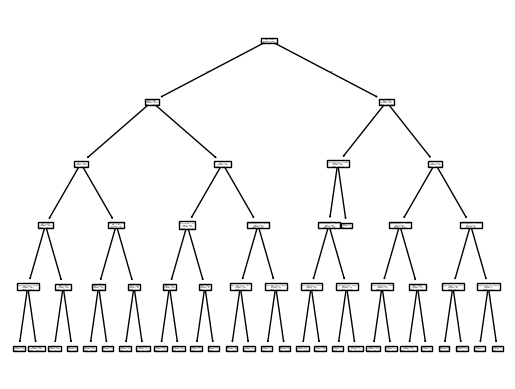

In [27]:
from sklearn.tree import plot_tree
plot_tree(classifier,feature_names=x.columns)

In [28]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x,y)
ada.score(x,y)

d:\S.K. Intillicy\ml projects (advanced)\new project\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9498409591387326

In [29]:
ada.score(x_te,y_te)

0.9549902152641878

In [30]:
train.select_dtypes(exclude="object").columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'Yes', 'Male', 'Urban', 'formerly smoked',
       'never smoked', 'smokes', 'Never_worked', 'Private', 'Self-employed',
       'children'],
      dtype='object')